####    Problem statement:

    X Education is an online education company targeting industry professionals.They attract potential customers through         various marketing channels and collect leads via website forms and referrals. However, their lead conversion rate is    low, with only 30% of leads being converted. To improve efficiency, the company wants to identify "Hot Leads" with the  highest conversion potential. By focusing their efforts on these leads, the conversion rate is expected to increase. The task at hand is to build a lead scoring model that assigns scores to leads, enabling the sales team to prioritize       high-scoring leads. The CEO aims for a target lead conversion rate of approximately 80%.


####    Business Goal:

    The provided dataset contains approximately 9000 data points, including attributes like Lead Source, Total Time Spent on Website, Total Visits, and Last Activity. The target variable is 'Converted,' indicating whether a lead was converted (1) or not (0). Categorical variables may have a level called 'Select,' which is equivalent to a null value. The case   study aims to construct a logistic regression model that assigns a lead score between 0 and 100. This score will help   the company target potential leads effectively, with higher scores indicating a higher likelihood of conversion.        The model should also accommodate future changes in the company's requirements and handle additional problems as needed.

####     Steps to be followed:
     
     1. Load necessary libraries
     2. Reading and understanding the dataset
     3. Clean and drop unnecessary columns
     4. Imputing,Caping varables wherever necessary
     5. Visualization
     6. Preparing dataset, creating dummies, converting yes/no
     7. Spliting data into train-test
     8. Model building
     9. Evaluting the model
     10. Lead Scoring
     11. Summary

###  Load libraries

In [412]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [413]:
# load libraries
import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set option to display max 100 columns & 100 rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# for train -test split
import sklearn
from sklearn.model_selection import train_test_split

# for feature scaling (MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Import RFE used in feature elimination
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# model evaluation
from sklearn.metrics import r2_score

# compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Reading the datset

In [414]:
#read the data
leads = pd.read_csv('leads.csv')

#to check first 5 rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### TARGET
We need to Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [415]:
# number of rows and cols
leads.shape

(9240, 37)

- 37 columns and 9240 rows

In [416]:
# statistical summary for the numerical variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [417]:
#to check the null/not null values and column datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [418]:
#check for duplicates
leads.duplicated().sum()

0

    Insight: there are no duplicates present in the data set

### Data Cleaning 

In [419]:
# checking for the null values in column data

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [420]:
# Check the column wise null percentages.

leads_null=round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)
print(leads_null[leads_null > 0])

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


In [421]:
# Replacing 'Select' with NaN (Since it means no option is selected )
leads = leads.replace('Select',np.nan)

In [422]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
What is your current occupation                     6
City                                                6
Lead Origin                                         5
Lead Profile                                        5
Lead Quality                

In [423]:
# Dropping unique valued columns as these columns will not add any value to the analysis[unique values = 1]
leads= leads.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine','I agree to pay the amount through cheque'],axis=1)


In [424]:
# Check the column wise null percentages, after dropping and changing the values SELECT to Nan.

leads_null=round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)
print(leads_null[leads_null > 0])

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


In [425]:
# Check the column wise null percentages, Higher than 40%

leads_null=round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)
print(leads_null[leads_null > 40])

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Index           45.65
dtype: float64


In [426]:
# Removing all the columns that are not required and have high >40% null values
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)


In [427]:
# Checking first five rows of the leads dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [428]:
#dropping Lead Number and Prospect ID as these are identifiers which will not add value to the data analysis
leads.drop(['Prospect ID', 'Lead Number'],axis=1,inplace = True)

In [429]:
#remaiming columns
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [430]:
# Check the column wise null percentages, Higher than 15%

leads_null=round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)
print(leads_null[leads_null > 15])

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64


   Working on columns where null percentage is Higher than 15%

    Country : The country of the customer.
    city :The city of the customer.

In [431]:
# check uniques values for city column
print(leads['City'].value_counts(dropna=False))

print('-'*40,"\n")

# check uniques values for country column
print(leads['Country'].value_counts(dropna=False))


NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
---------------------------------------- 

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh   

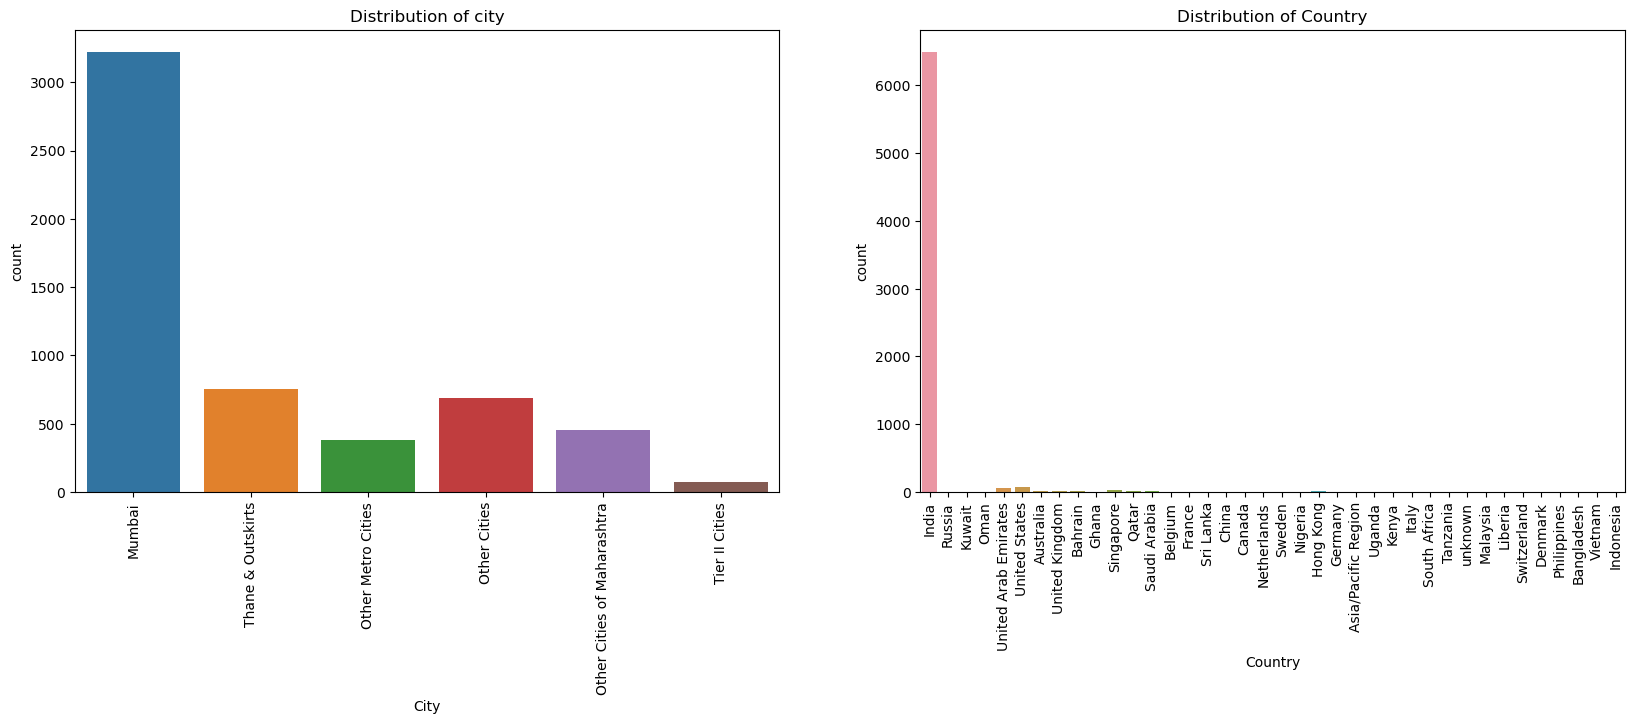

In [432]:
## plotting City and Country
plt.figure(figsize=(20,6))

# 1st plot in subplot
plt.subplot(1,2,1)
plt.title("Distribution of city")
sns.countplot(leads.City)
plt.xticks(rotation = 90)
          
# 2nd plot in subplot
plt.subplot(1,2,2)
plt.title("Distribution of Country")
sns.countplot(leads.Country)
plt.xticks(rotation = 90)          
          
plt.show()

#### we can drop City and Country as percentage missing values are high and it is highly dense to one value like India and Mumbai.

In [433]:
#dropping Country and City column
leads.drop(['Country','City'],axis=1,inplace = True)
leads.shape

(9240, 21)

#### Specialization 
    The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [434]:
# check uniques values for Specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### we can either drop the values containing NaN or replace with other.For time being we are replacing with 'Other' so that we don't miss out any important data

In [435]:
# Creating a separate category called 'Others' for Specialization column 
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [436]:
# Recheck uniques values for Specialization column
leads['Specialization'].value_counts(dropna=False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

    Tags : Tags assigned to customers indicating the current status of the lead.

In [437]:
# check percentage of uniques values for Tags column
leads['Tags'].value_counts(normalize = True, dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [438]:
#  22% of data belongs to 'will revert after reading the mail' and 36% of data is missing.
# Here imputing the missing value or replace the missing value will make the data highly skewed , hence dropping this column.


In [439]:
#dropping Tags column
leads.drop('Tags',axis=1,inplace = True)

    What matters most to you in choosing a course: An option selected by the customer indicating what is their main motto behind doing this course.

In [442]:
# Handling 'What matters most to you in choosing a course
# check unique values in 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [443]:
# check percentage of unique values in 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(normalize=True, dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

     The majority belongs to  'Better Career Prospects' which is reason behind people in choosing the course and if we replace the NaN values with 'Better Career Prospects', the column will become skewed and should be dropped from the dataset.

In [444]:
#dropping 'What matters most to you in choosing a course' column
leads.drop('What matters most to you in choosing a course', axis=1,inplace = True)

    'What is your current occupation' : Indicates whether the customer is a student, umemployed or employed.

In [445]:
# Handling 'What is your current occupation' column
# Check unique values in  'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [446]:
# we can replace NaN values 'Other'
leads['What is your current occupation'].replace(np.nan,'Other',inplace=True)
print(leads['What is your current occupation'].value_counts(dropna=False))

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [447]:
# Renaming column name to "Current_occupation" from "What is your current occupation"
leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

    Checking the rest of the columns after dropping/imputing the values

In [448]:
# Check the column wise null percentages

leads_null=round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)
print(leads_null[leads_null > 0])


TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64


In [449]:
# as the percentage of null values is quite low we can drop the rows containg null values.
leads = leads.dropna()

In [450]:
# Check the column wise null percentages

round((leads.isna().sum())/len(leads.index) * 100,2).sort_values(ascending=False)


Lead Origin                               0.0
Current_occupation                        0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
Specialization                            0.0
Lead Source                               0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

In [451]:
# get the rows and columns for leads dataframe
print(leads.shape)

(9074, 19)


In [452]:
# get columns in leads dataframe
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'Current_occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [453]:
#Checking the rest of the columns before moving further in EDA

    'Lead Origin': The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

In [454]:
# check percentage of unique values in Lead Origin
leads['Lead Origin'].value_counts(normalize=True, dropna= False)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

In [455]:
#Combining categories with very low row percentages
leads['Lead Origin'] = leads['Lead Origin'].replace(['Lead Import','Lead Add Form'] ,'Others')

In [456]:
#Checking if the category has been correctly replaced. 
leads['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.538351
API                        0.394313
Others                     0.067335
Name: Lead Origin, dtype: float64

    'Lead Source': The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

In [457]:
#Inspecting Lead Source column.
leads['Lead Source'].value_counts(normalize=True, dropna= False) 

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [458]:
#Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case.
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [459]:
#Combining categories
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [460]:
#Inspecting Lead Source column.
leads['Lead Source'].value_counts(normalize=True) 

Google              0.316619
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Welingak Website    0.014216
Referral Sites      0.013776
Others              0.005951
Name: Lead Source, dtype: float64

    'Do Not Email':An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.


In [461]:
# inspecting 'Do Not Email' column
leads['Do Not Email'].value_counts(normalize=True, dropna= False) 

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

In [462]:
# inspecting 'Do Not Email' column
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [463]:
#As the column is highly skewed we will drop this column
leads.drop(['Do Not Email'], axis=1,inplace = True)

    'Do Not Call': An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.


In [464]:
# inspecting 'Do Not Call' column
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [465]:
# inspecting 'Do Not Call' column
leads['Do Not Call'].value_counts(normalize=True, dropna= False) 

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [466]:
#As the column is highly skewed we will drop this column as well
leads.drop(['Do Not Call'], axis=1,inplace = True)

    'Converted':The target variable. Indicates whether a lead has been successfully converted or not.


In [467]:
leads['Converted'].value_counts(normalize=True, dropna= False) 

0    0.621446
1    0.378554
Name: Converted, dtype: float64

    Converted columns value seems alright

#### Numerical variables

In [468]:
# List out the numerical variables that are part of the DataFrame
num_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# Describe the numeric columns
leads[num_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


       'TotalVisits': The total number of visits made by the customer on the website.


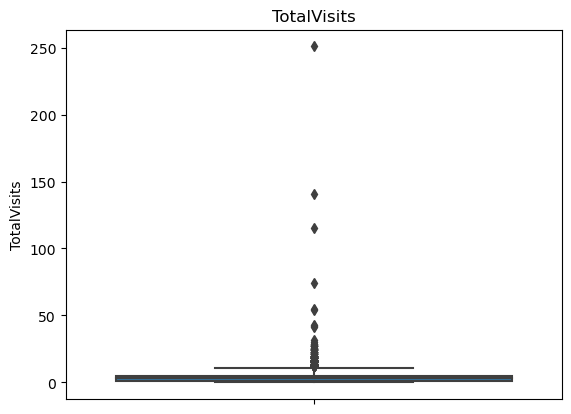

In [469]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.title("TotalVisits")
plt.show()

In [470]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

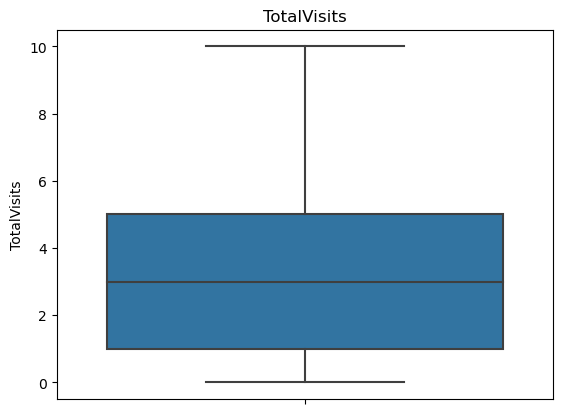

In [471]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.title("TotalVisits")
plt.show()

In [472]:
#checking percentiles for "TotalVisits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.191867
std         2.780618
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

    'Total Time Spent on Website': The total time spent by the customer on the website.


In [473]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

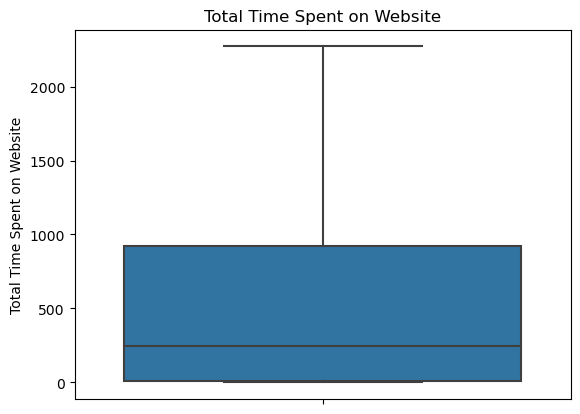

In [474]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.title("Total Time Spent on Website")
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

    'Page Views Per Visit': Average number of pages on the website viewed during the visits.


In [475]:
#checking percentiles for "Page Views Per Visit"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

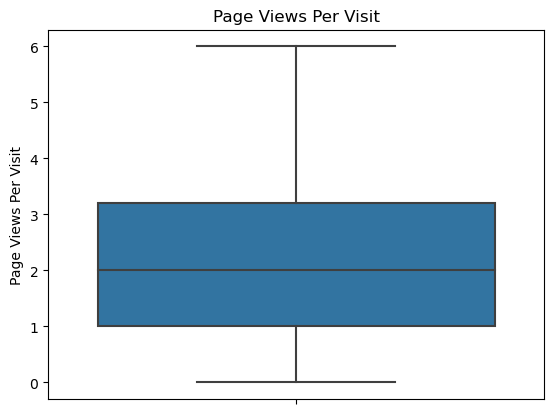

In [476]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.title("Page Views Per Visit")
plt.show()

       'Last Activity':Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.


In [477]:
#checking value counts of Last Activity
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [478]:
#combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                         'View in browser link Clicked','Approached upfront',       
                                                        'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails',],'Others')

In [479]:
# reinspect Last Activity column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

       The following columns Indicats whether the customer had seen the ad in any of the listed items.

In [480]:
# check percentahe value counts for Search column
leads['Search'].value_counts(normalize=True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [481]:
# check percentahe value counts for Newspaper Article column
leads['Newspaper Article'].value_counts(normalize=True) 

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [482]:
# check percentahe value counts for X Education Forums column
leads['X Education Forums'].value_counts(normalize=True) 

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [483]:
# check percentahe value counts for Digital Advertisement column
leads['Digital Advertisement'].value_counts(normalize=True) 

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

In [484]:
# check percentahe value counts for Through Recommendations column
leads['Through Recommendations'].value_counts(normalize=True) 

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

In [485]:
#Data is higly skewed in the  hence we are dropping these column
leads.drop(['Search','Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations'], axis=1, inplace = True)

    'A free copy of Mastering The Interview':Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.


In [486]:
# check percentahe value counts for column A free copy of Mastering The Interview column
leads['A free copy of Mastering The Interview'].value_counts(normalize=True) 

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [487]:
# we will sustain this column as this might help with some insights

In [488]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)


In [489]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [490]:
# According to data dictionary the coulmn indicates :The last notable acitivity performed by the student.
# hence dropping the column as it's more baised to students.

In [491]:
# drop Last Notable Activity' column
leads.drop(['Last Notable Activity'],axis=1,inplace = True)

In [492]:
# check rows and columns of the dataframe
leads.shape

(9074, 10)

In [493]:
# columns in the dataframe
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Current_occupation', 'Free_copy'],
      dtype='object')

#### Data cleaning process :-

   - "Select" value will be replaced with NaN
   - Drop columns that has missing value percentage of about 40% approximately.
   - Checking the unique category for each column.
   - If the columns is highly skewed with one category,such columns will be dropped. 
   - Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
   - Imputing the column with least missing values percentage.
   - Finally Checking for the number of rows retained after performing all the above steps.

In [494]:
# print columns in the dataframe
print(leads.columns)

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Current_occupation', 'Free_copy'],
      dtype='object')


In [495]:
# Determine the percentage of data retained

num_data = round(100*(len(leads)/9240),2)
print(num_data)

98.2


   #### Insight: 
     98.2% data was retained after cleaning for the modeling.


# Visualising the Data

We'll visualise our data using matplotlib and seaborn.

- categorical variables
   - Lead Origin
   - Lead Source
   - Last Activity
   - Specialization
   - Current_occupation
   - Free_copy
  
- numeric variables
   - Converted
   - Total Visits
   - Total Time Spent on Website
   - Page Views Per Visit

In [496]:
# check first five rows of the dataframe
leads.head() 

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [497]:
#describe numerical columns
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


In [498]:
# Converted : The target variable. Indicates whether a lead has been successfully converted or not.
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

#### Insight: 
    The lead conversion rate ~ 38% 

### Categorical variables

In [499]:
# visualizing the categorical columns , to see how predictor variable stands against the target variable
# to create many box plots:  we will create sub plots


#### lead source and Lead Source

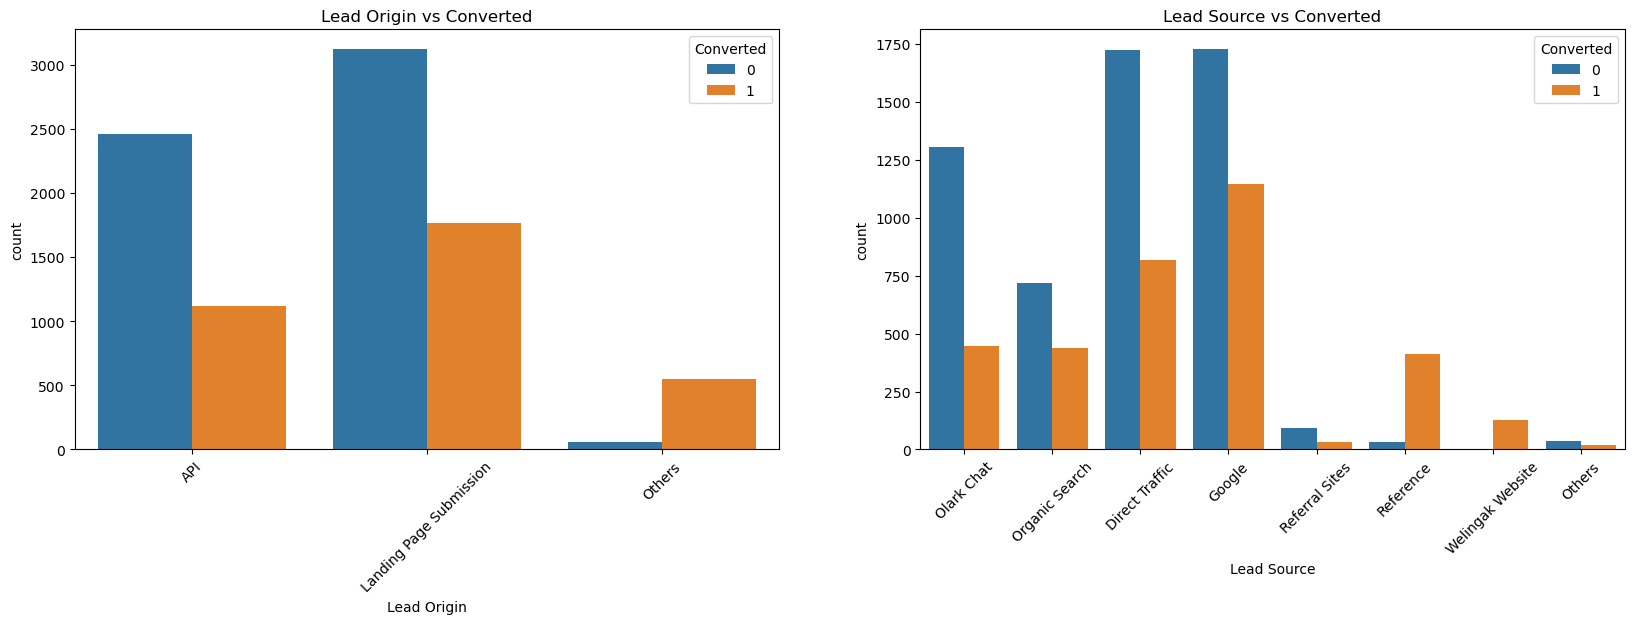

In [500]:
plt.figure(figsize=(20, 12)) # to control the size of figure

plt.subplot(2,2,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Lead Origin vs Converted")

plt.subplot(2,2,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Lead Source vs Converted")




plt.show()

#### Insight:
    with comparion of target variable `Converted`-
    - `Lead Origin`: API and Landing Page Submission more conversion rate 
    - `Lead Source`: Google and Direct traffic have more conversion rate.

#### Last Activity and Free copy

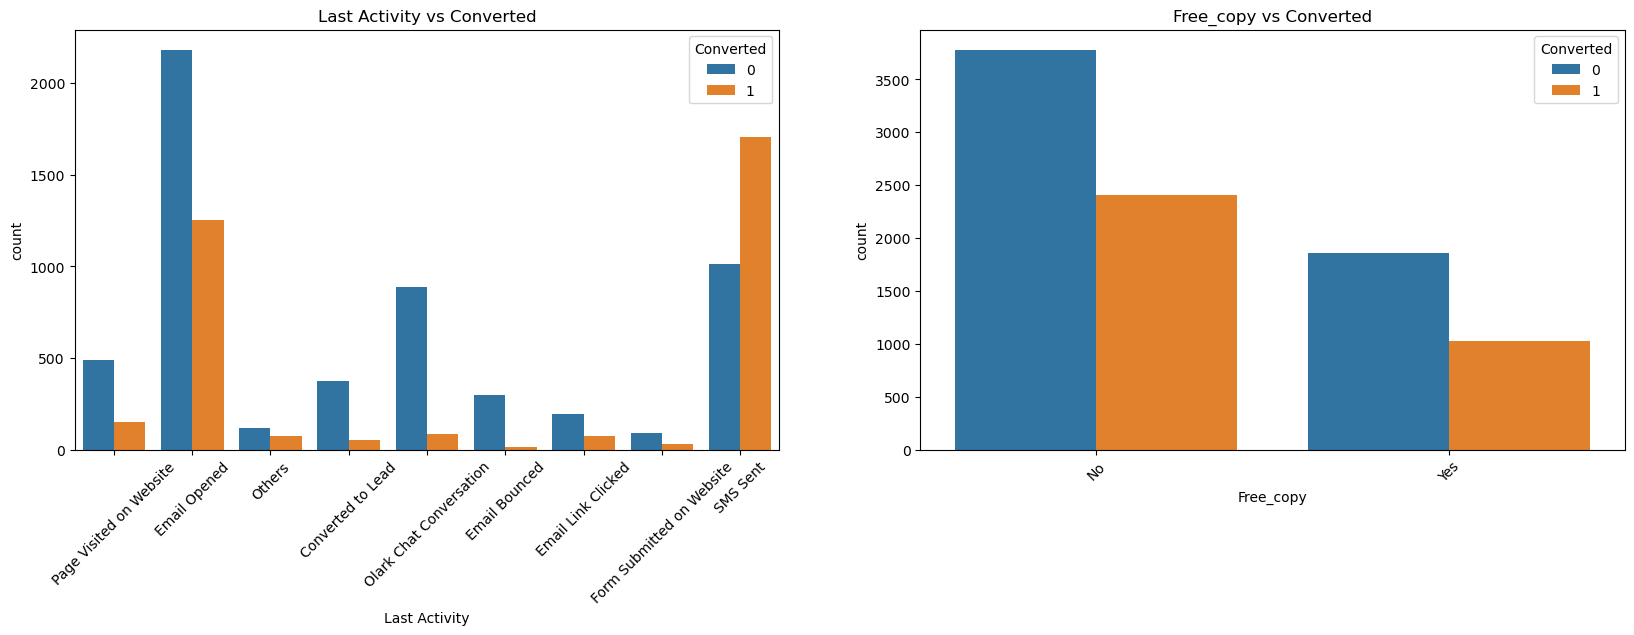

In [501]:
plt.figure(figsize=(20, 12)) # to control the size of figure

plt.subplot(2,2,1)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Last Activity vs Converted")

plt.subplot(2,2,2)
sns.countplot(x = 'Free_copy', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Free_copy vs Converted")

plt.show()

#### Insight:
       with comparion of target variable `Converted`-
    - `Last Activity`: Email Opened and SMS sent contribute the highest leads.
    - `Free_copy`: Giving a free copy for the interview doesnt seems to have ny realtion with lead conversion

#### Specialization and current_occupation

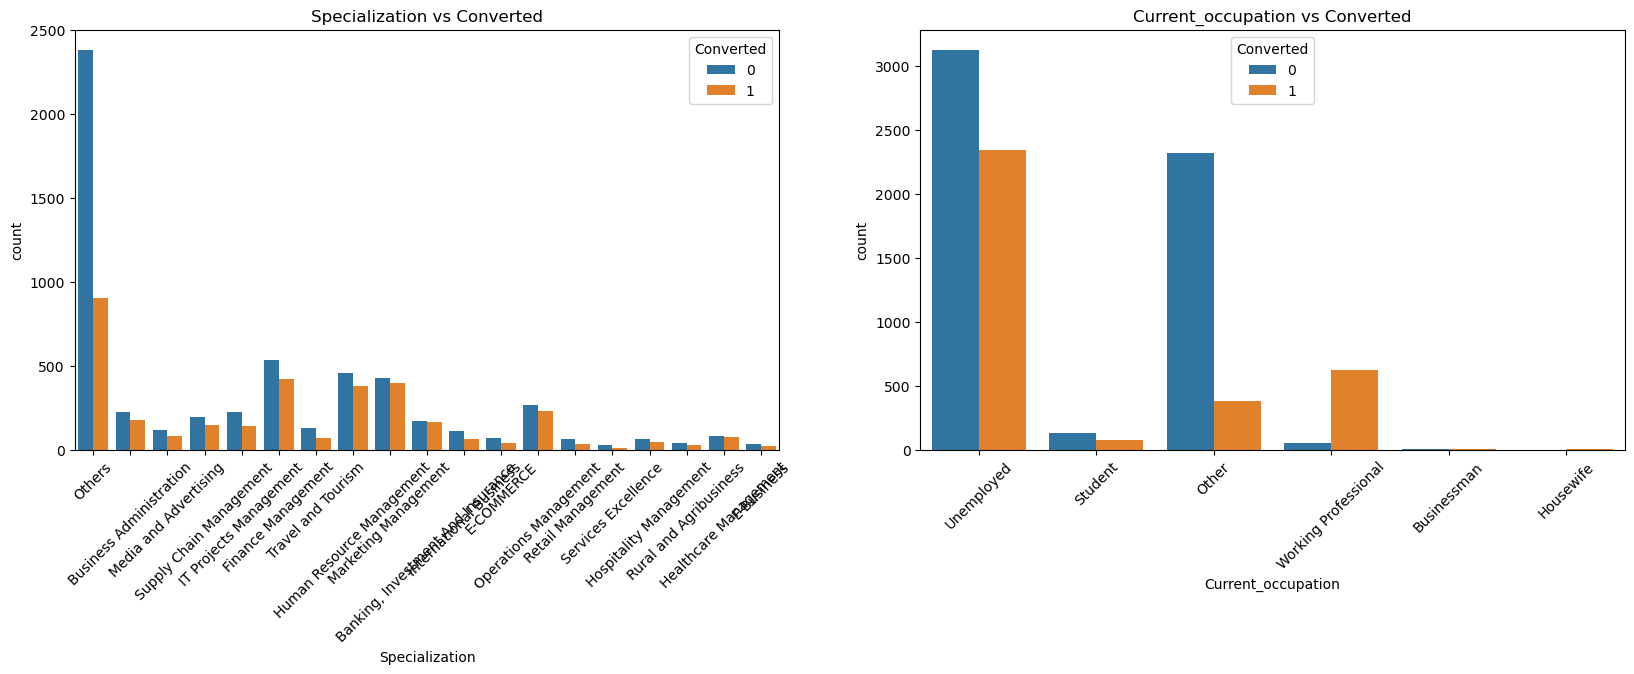

In [502]:
plt.figure(figsize=(20, 12)) # to control the size of figure

plt.subplot(2,2,1)
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Specialization vs Converted")

plt.subplot(2,2,2)
sns.countplot(x = 'Current_occupation', hue = 'Converted', data = leads)
plt.xticks(rotation = 45)
plt.title("Current_occupation vs Converted")


plt.show()

#### Insight:
       comparion of target variable `Converted`-
    - `Specialization`: Certain Specialization can be targeted as that have more lead conversion than rest of Specialization.
    - `Current_occupation`: Unemployed group of people has higher conversion rate, we can also target working profesional as well.

### Numerical variables

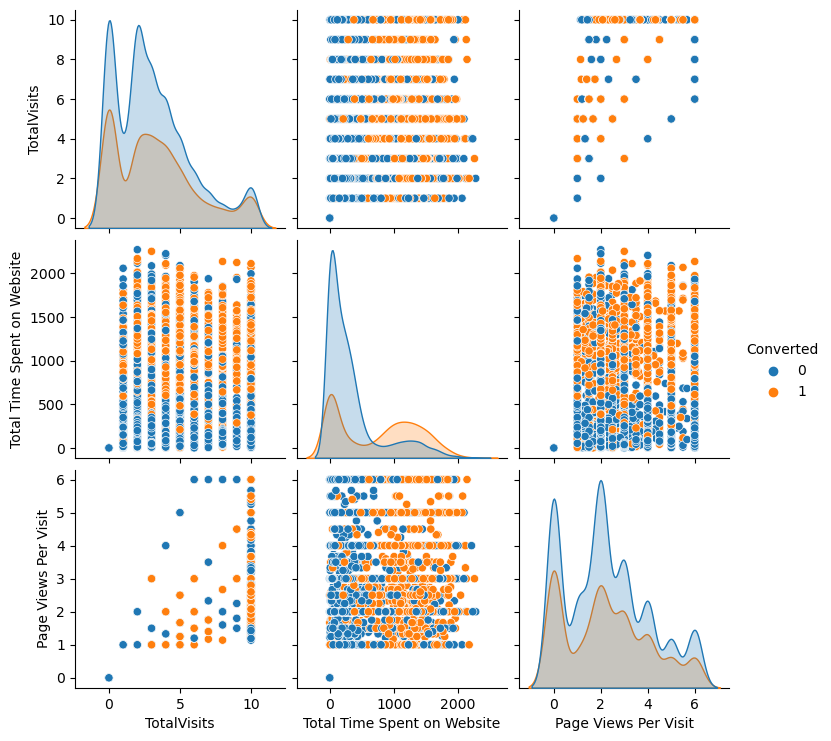

In [503]:
#creating pair plot, to visualize the numerical columns
sns.pairplot(data = leads,vars=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'],hue = 'Converted' )
plt.show()

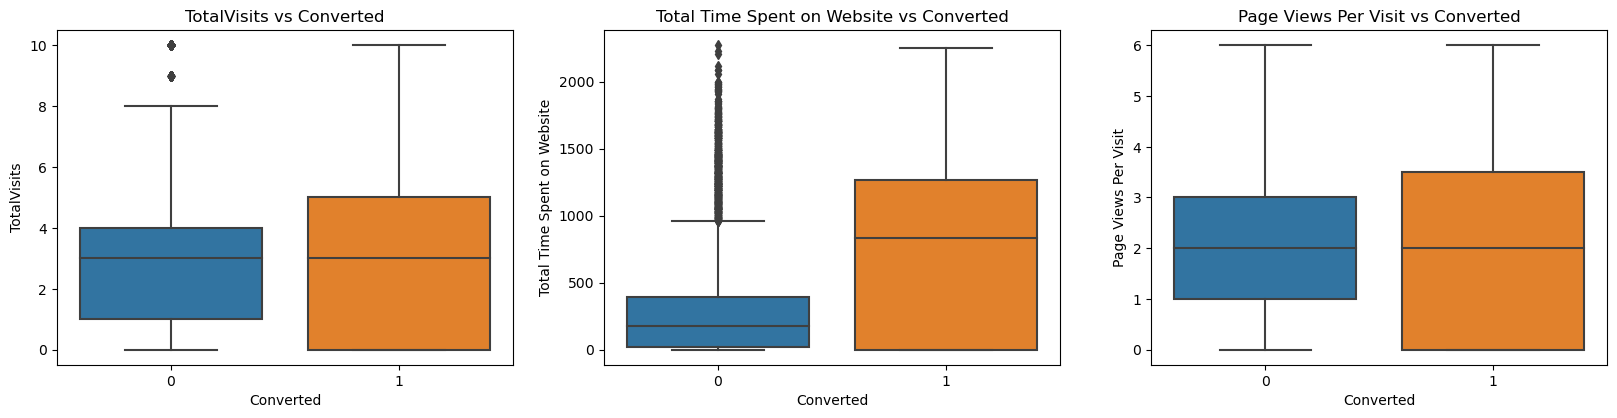

In [504]:
#barplot,# Visualizing  w.r.t Target Variable 'Converted'

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', x='Converted',  data = leads)
plt.title("TotalVisits vs Converted")


plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x='Converted',  data = leads)
plt.title("Total Time Spent on Website vs Converted")

plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', x='Converted', data = leads)
plt.title("Page Views Per Visit vs Converted")
plt.show()

#### Insight:
       with comparion of target variable `Converted`-
    - `TotalVisits`: We can't draw any Insight
    - `Total Time Spent on Website`: Customers spending more time at website has higher conversion rate.
    - `'Page Views Per Visit`:  We can't draw any Insight
    overall conversion rate was higher for Total Visits and Total Time Spent on Website

## Data Preparation

    CREATING DUMMIES
    converting yes/no to 1/0

In [505]:
# check first five rows of the dataframe
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### CREATING DUMMIES

In [506]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin' ,'Lead Source' , 'Last Activity','Specialization', 'Current_occupation','Free_copy']], drop_first=True)
# Add the results to the master dataframe
Leads_dum = pd.concat([leads, dummy], axis=1)
Leads_dum.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [507]:
# drop the categorical variable for which dummies were created
Leads = Leads_dum.drop(['Lead Origin' ,'Lead Source' , 'Last Activity','Specialization', 'Current_occupation','Free_copy'], 1)
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
0,0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [508]:
# check the columns
Leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Proj

In [509]:
# check the shape of new dataframe

Leads.shape

(9074, 45)

### Splitting the Data into Training and Testing Sets

In [510]:
# Putting feature variable to X
X = Leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [511]:
# Putting the target variable in y
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [512]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [513]:
# Scale the three numeric features
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [514]:
# inspect X_test dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
3271,4.0,157,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1490,5.0,1513,5.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
7936,2.0,74,2.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4216,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3830,8.0,164,6.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [515]:
### Checking the Converted Rate
converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
converted

37.85541106458012

   We have almost 38% conversion rate

### Looking at Correlations

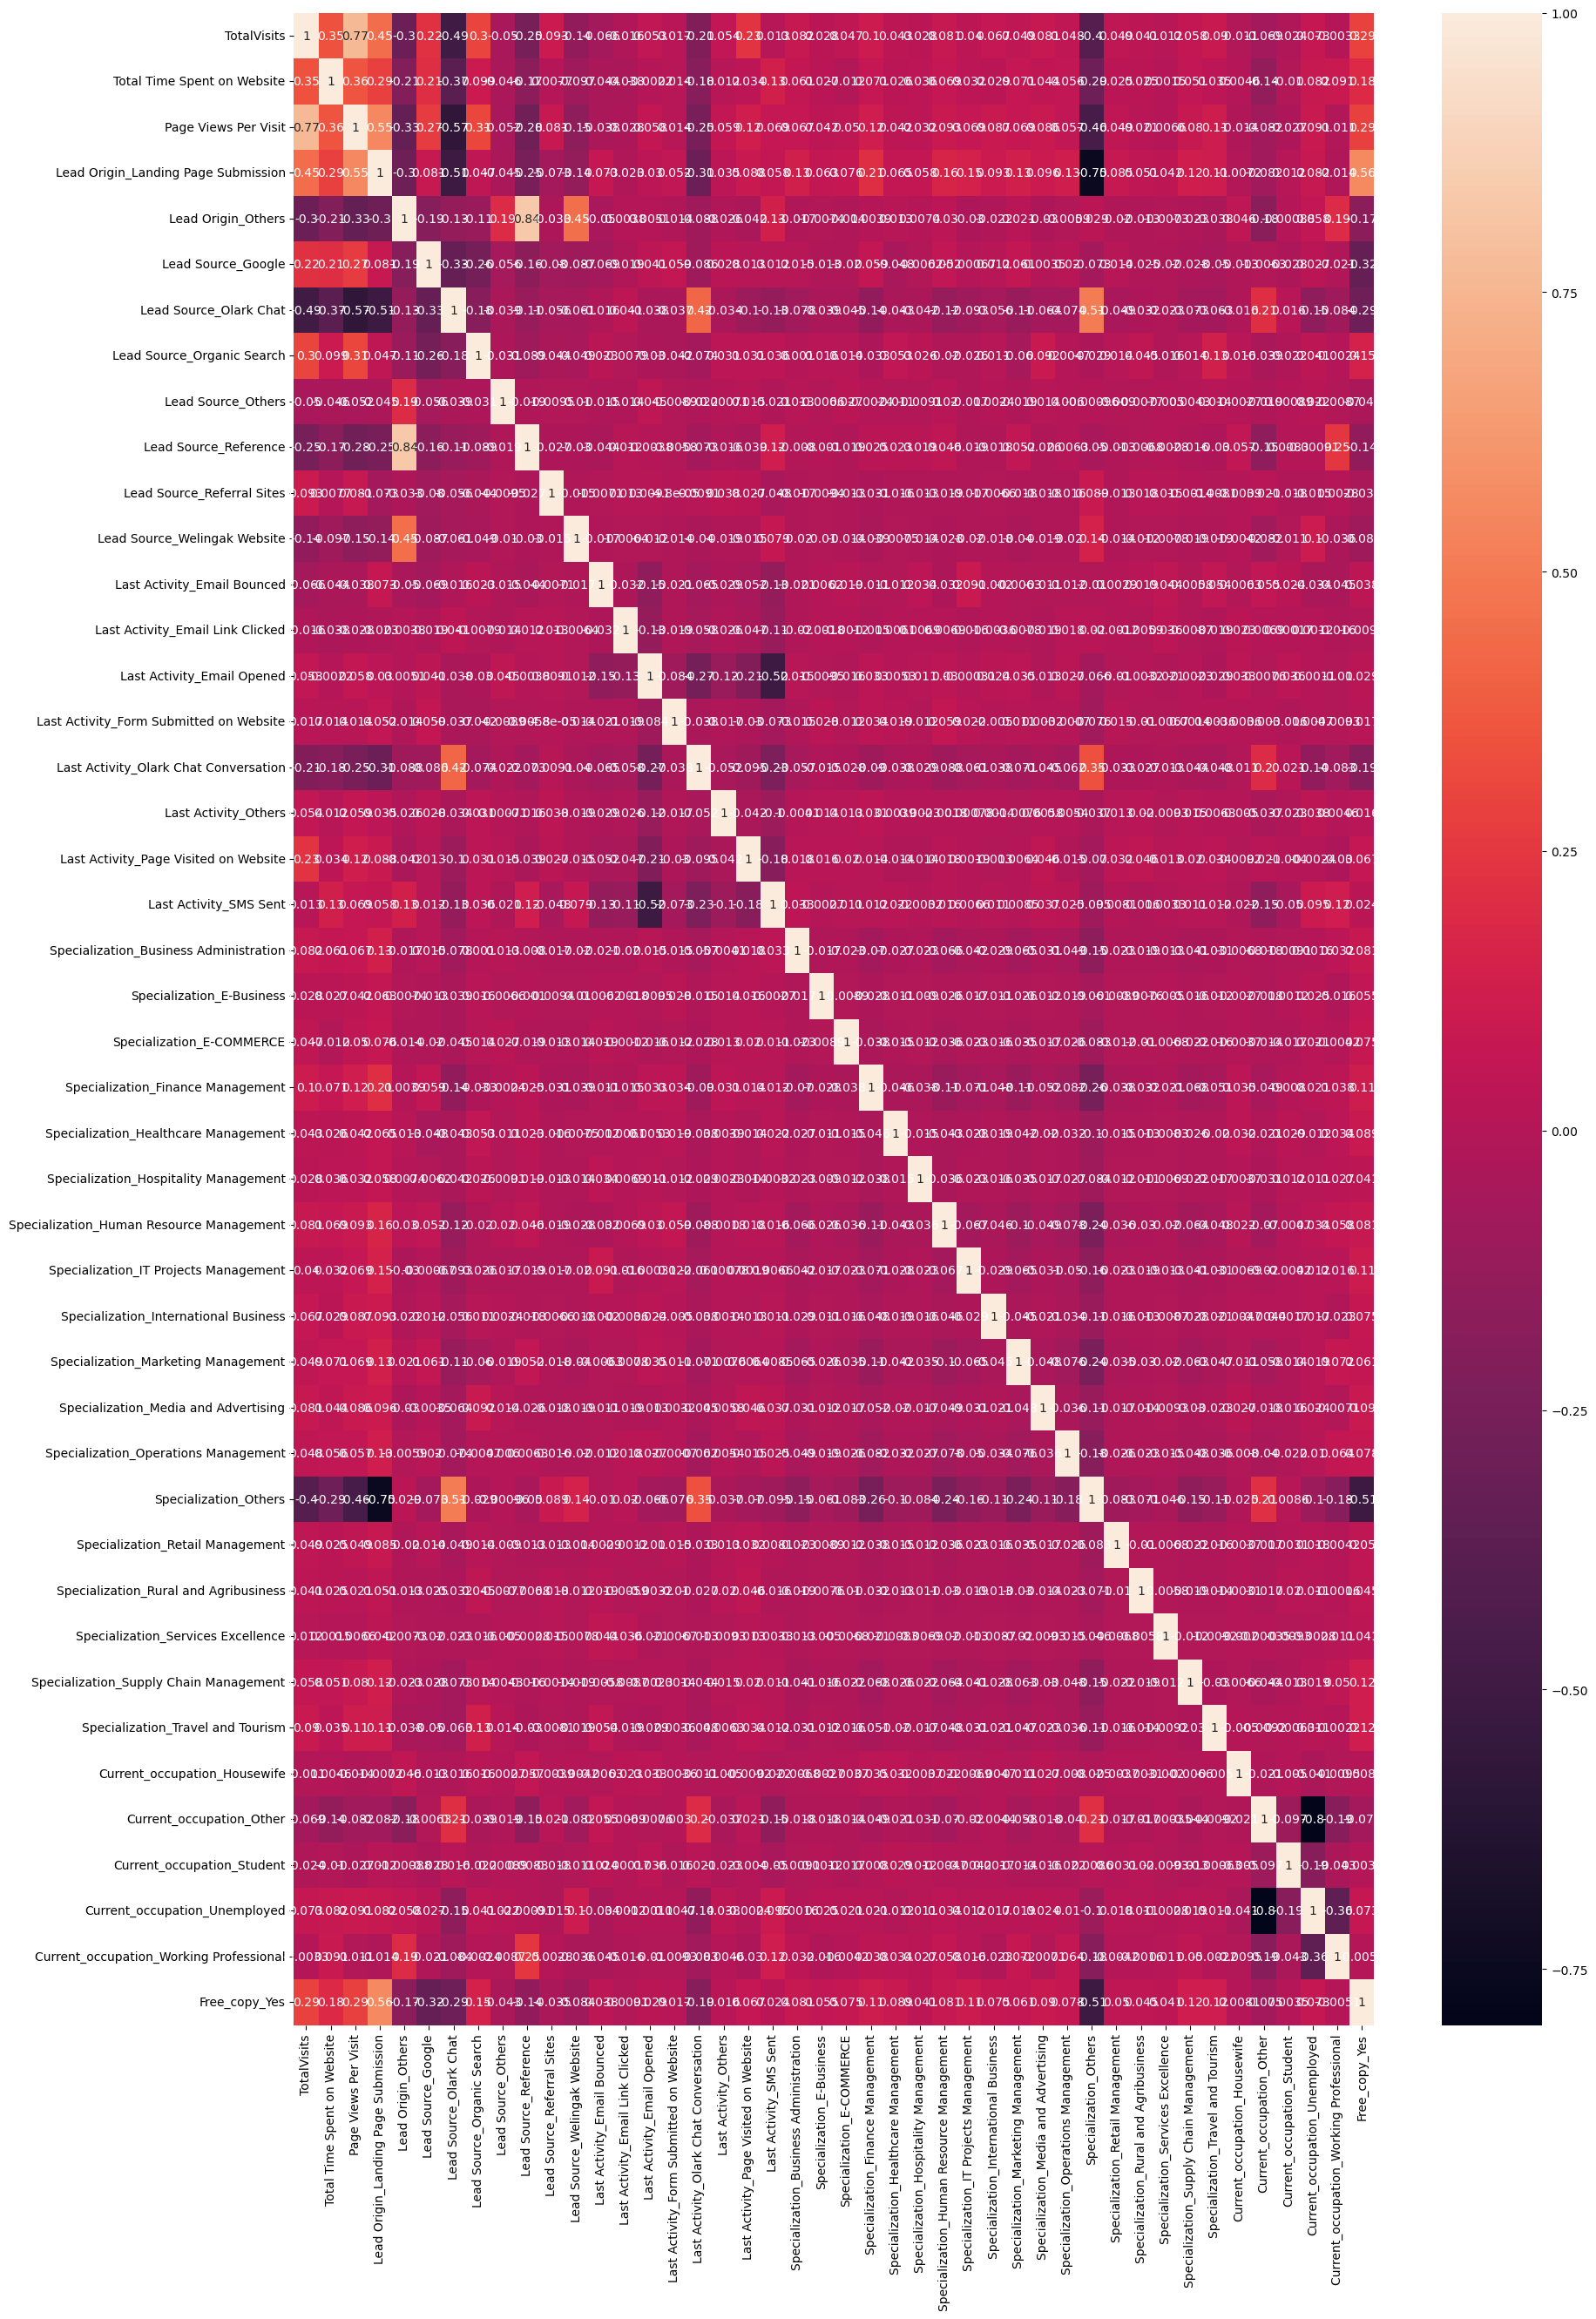

In [516]:
# # Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(20,30)) 

sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Model building

#### Running Your First Training Model

    Insight:
   - there are 6351 observations , in features.
   - we will use RFE
     coarse tuning or hard tuning: we will reduce the variables , like 15 best feature
     to further refine, we will look the coeficient and manually remove them: fine tuning

###  Feature Selection Using RFE

In [517]:
# instantiate object for LogisticRegression
logreg = LogisticRegression()

In [ ]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# for each of columns, whether it was in top 15 columns
rfe.support_

In [ ]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

#### MODEL1

In [ ]:
# build a model with all variables:MODEL 1

# add a constant
X_train_sm = sm.add_constant(X_train[col])

# create model
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit
res = logm1.fit()

#fit
res.summary()

#### Checking VIF

     drop variables on basis
  1. based on significance (p - values)
  2. VIF: how collinear a variable is/multicollinarity

##### the rule we will follow:
- usaully we need VIF we need less than 5
we could have:
    - high p -value, high VIF: definitly drop, as high p value hence less significant, and high VIF more correlated)
    - High-low:
        - High p, low VIF : REMOVE THESE FIRST

        -low p, high VIF : REMOVE THESE AFTER THE ONES ABOVE
        
    - both low: low p, low VIF : but here not significant but correlated : SO WE KEEP THIS

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

    We will drop 'Lead Origin_others' as it has high VIF and high p-value

#### MODEL 2

In [ ]:
# Dropping highly correlated variables and insignificant variables
col = col.drop('Lead Origin_Others',1)

In [ ]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Calculate the VIFs again for the  model2

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

    WE WILL REMOVE current occupation_housewife,because : High p, low VIF

#### MODEL 3

In [ ]:
# Dropping highly correlated variables and insignificant variables
col = col.drop('Current_occupation_Housewife',1)

In [ ]:
# Building 3rd Model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

     Insight: 
     As we can notice the VIF values are less than 5.
     Similary P- values are significant hence we will stop dropping columns, and finalize the model3

### Creating Prediction

In [ ]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
#Creating a dataframe with the actual conversion flag and the predicted probabilities


In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_Id'] = y_train.index
y_train_pred_final.head()

In [ ]:
#Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0


In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

### Evaluate the model


In [ ]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

###  Metrics beyond simple accuracy

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
# of all the cases when you captured correct,how well you captured 1
TP/(TP+FN)

In [ ]:
# Calculate the specificity

TN/(TN+FP)

In [ ]:
# Calculate false postive rate - predicting coverted when customer did not convert
# falsy classifed as false 
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))
# everything identified as positive and it predicted right

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))
# of all negative which you said negative was predicted negative

### Final model[MODEL 3]  accuracy (~ 81.59%) , specificity (~ 88.70%), sensitivity(~70.23%)

In [ ]:
### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Compute Receiver operating characteristic (ROC)
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
# draw roc curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.89 . we  to have a good model. 
check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("ROC Curve")
plt.legend()
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [ ]:
# create final_predicted variable based on Converted_Prob column using cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# extract true/false positives/negatives for sensitivity, specificity, precision and recall
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting converted when customer did not convert
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

##### Precision
TP / TP + FP

##### Recall
TP / TP + FN

In [354]:
# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7957387679481241

In [355]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7023712183156173

### Precision and recall tradeoff

In [356]:
# print converted and predicted variables
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [357]:
# Compute precision-recall pairs for different probability thresholds.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


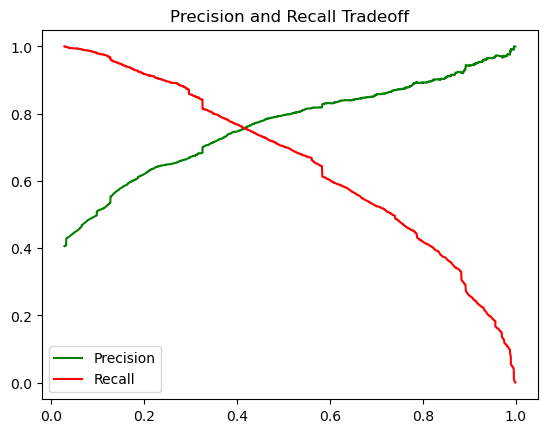

In [401]:
# Precision and recall tradeoff
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.title("Precision and Recall Tradeoff")
plt.legend()
plt.show()

In [359]:
# create final_predicted variable based on Converted_Prob column using cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.079661,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.072780,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.582423,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.651754,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.904099,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [361]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8162494095418045

##### Train set Accuracy: 81.62%

In [362]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3372,  533],
       [ 634, 1812]], dtype=int64)

In [363]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [364]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.740801308258381

#####  Train set Sensitivity : 74.08%

In [365]:
# Let us calculate specificity
TN / float(TN+FP)

0.8635083226632523

In [366]:
# Calculate Precision

TP/(TP+FP)

0.7727078891257996

In [367]:
# Calculate Recall

TP/(TP+FN)

0.740801308258381

#### Insight:
         Due to higher accuracy and sensitivity, we will adhere to the 0.44 cutoff point for our analysis.

###  Making predictions on the test set

In [369]:
## Scaling
X_test[[ 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [370]:
# check first 5 rows
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Free_copy_Yes
3271,0.284772,-0.600595,0.955505,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1490,0.643547,1.887326,1.510766,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
7936,-0.432779,-0.752879,-0.155018,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4216,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3830,1.719873,-0.587751,2.066027,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [371]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,Current_occupation_Other,Current_occupation_Working Professional
3271,-0.600595,0,0,0,0,0,1,0,0,0,1,1,0
1490,1.887326,1,0,0,0,0,1,0,0,0,0,0,1
7936,-0.752879,0,0,0,0,0,1,0,0,0,1,1,0
4216,-0.888650,0,0,1,0,0,1,0,0,0,0,0,0
3830,-0.587751,1,0,0,0,0,1,0,0,0,0,1,0


In [372]:
# add constant 
X_test_sm = sm.add_constant(X_test)

In [373]:
# Make predictions on the test set and store it in the variable 'y_test_pred'


In [374]:
y_test_pred = res.predict(X_test_sm)

In [375]:
# check rows of the dataframe
y_test_pred[:10]

3271    0.055046
1490    0.967583
7936    0.046851
4216    0.882636
3830    0.050993
1800    0.612008
6507    0.324412
4821    0.339762
4223    0.891648
4714    0.295938
dtype: float64

In [376]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [377]:
# Let's see the first few rows
y_pred_1.head()

,0
3271,0.055046
1490,0.967583
7936,0.046851
4216,0.882636
3830,0.050993


In [378]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [379]:
# Putting ProspectID to index
y_test_df['Prospect_ID'] = y_test_df.index

In [380]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [381]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [382]:
# Let's see the first few rows of y_pred_final

y_pred_final.head()

,Converted,Prospect_ID,0
0,0,3271,0.055046
1,1,1490,0.967583
2,0,7936,0.046851
3,1,4216,0.882636
4,0,3830,0.050993


In [383]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [384]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_ID','Converted','Converted_Prob'], axis=1)

In [385]:
# Let's see the first few rows of y_pred_final

y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob
0,3271,0,0.055046
1,1490,1,0.967583
2,7936,0,0.046851
3,4216,1,0.882636
4,3830,0,0.050993


In [386]:
# create final_predicted variable based on Converted_Prob column using cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [387]:
# Let's see the first few rows of y_pred_final

y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.055046,0
1,1490,1,0.967583,1
2,7936,0,0.046851,0
3,4216,1,0.882636,1
4,3830,0,0.050993,0


In [388]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8207858979067205

##### Test set Accuracy: 82.07%

In [389]:
# generate confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1502,  232],
       [ 256,  733]], dtype=int64)

In [390]:
# extract true/false positives/negatives from confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [391]:
# Calculate Precision

TP/(TP+FP)

0.7595854922279792

In [392]:
# Calculate Recall

TP/(TP+FN)

0.7411526794742164

In [393]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.7411526794742164

#####  Train set Sensitivity : 74.11%

## Lead Scoring

In [394]:
#Assigning Lead Score to the Testing data
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_ID,Converted,Converted_Prob,final_predicted,lead_score
1137,5815,1,0.994777,1,99
868,2495,1,0.996436,1,99
33,4062,1,0.995896,1,99
280,5797,1,0.995680,1,99
1068,1568,1,0.995680,1,99
...,...,...,...,...,...
729,7916,0,0.004740,0,0
1911,6669,0,0.004186,0,0
808,4019,0,0.008069,0,0
2074,7904,0,0.006837,0,0


In [395]:
# check few rows for y_pred_final dataframe
y_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,final_predicted,lead_score
0,3271,0,0.055046,0,5
1,1490,1,0.967583,1,96
2,7936,0,0.046851,0,4
3,4216,1,0.882636,1,88
4,3830,0,0.050993,0,5


####  'Hot Leads':
     leads which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. 

In [396]:
# get hot_leads with lead_Score > 80
hot_leads=y_pred_final.loc[y_pred_final["lead_score"]>=80]
hot_leads

,Prospect_ID,Converted,Converted_Prob,final_predicted,lead_score
1,1490,1,0.967583,1,96
3,4216,1,0.882636,1,88
8,4223,1,0.891648,1,89
16,1946,1,0.921664,1,92
21,2461,1,0.989398,1,98
...,...,...,...,...,...
2694,1566,1,0.944777,1,94
2699,6461,1,0.955182,1,95
2709,2815,0,0.804091,1,80
2715,6299,1,0.879399,1,87


     447 leads which can be contacted and have a high chance of getting converted.If we target lead_Score >= 80% 

In [397]:
### Checking the Converted Rate for 80 %
Converted_Rate_hot_leads= (sum(hot_leads['Converted'])/len(hot_leads['Converted'].index))*100
Converted_Rate_hot_leads

87.02460850111858

In [398]:
### Checking the Converted Rate for 95 %

hot_leads_95=y_pred_final.loc[y_pred_final["lead_score"]>=95]
Converted_Rate_hot_leads_95= (sum(hot_leads_95['Converted'])/len(hot_leads_95['Converted'].index))*100
Converted_Rate_hot_leads_95

95.95375722543352

#### Insight: 
    The conversion rate with the model is 95% for lead_score>=95, & 87.02% for lead_scores >= 80

In [399]:
# to find out key variables
res.params.sort_values(ascending=False)

Lead Source_Welingak Website               5.438487
Lead Source_Reference                      3.010145
Current_occupation_Working Professional    2.360103
Last Activity_SMS Sent                     1.806112
Lead Source_Olark Chat                     1.235184
Last Activity_Others                       1.116473
Total Time Spent on Website                1.115237
Last Activity_Email Opened                 0.743787
const                                     -0.745245
Last Activity_Olark Chat Conversation     -0.752193
Specialization_Others                     -0.972266
Lead Origin_Landing Page Submission       -1.067337
Current_occupation_Other                  -1.199444
Last Activity_Email Bounced               -1.517722
dtype: float64

## Summary


#    Results :
      Comparing the values obtained for Train & Test:
#### Train Data:

- Accuracy : 81.62 %
- Sensitivity : 74.08%


#### Test Data:

- Accuracy : 82.07 %
- Sensitivity : 74.11 %


  The company should call , or give more importance to the leads Origined from `Landing Page` as they have higher conversion rate.

  Company should focus on `Unemployed`, `Working Professional` and `Student` .

   Also who are active on `Email Opened`.

  `Total Time Spent on Website` is also a facor the company should focus on.
  
  The conversion rate with the model is 95% for lead_score>=95, & 87.02% for lead_scores >= 80
   
   From the given dataset 447 leads which can be contacted and have a high chance of getting converted.If we target lead_Score >= 80%  